In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#loading the Data
dataset_train = pd.read_csv('NFLX.csv')
print('shape is = {}'.format(dataset_train.shape))
print(dataset_train.head())

shape is = (251, 7)
         Date        Open        High         Low       Close   Adj Close  \
0  2023-04-28  325.239990  330.809998  324.000000  329.929993  329.929993   
1  2023-05-01  329.440002  331.230011  318.089996  324.119995  324.119995   
2  2023-05-02  325.000000  326.070007  315.619995  317.549988  317.549988   
3  2023-05-03  317.549988  324.619995  315.850006  319.299988  319.299988   
4  2023-05-04  319.010010  323.609985  317.950012  320.779999  320.779999   

    Volume  
0  4221900  
1  5341500  
2  4318600  
3  5064100  
4  3879700  


In [3]:
training_set = dataset_train.iloc[:,1:2].values
print('shape is ={}'.format(training_set.shape))
print(training_set[0:5])    

shape is =(251, 1)
[[325.23999 ]
 [329.440002]
 [325.      ]
 [317.549988]
 [319.01001 ]]


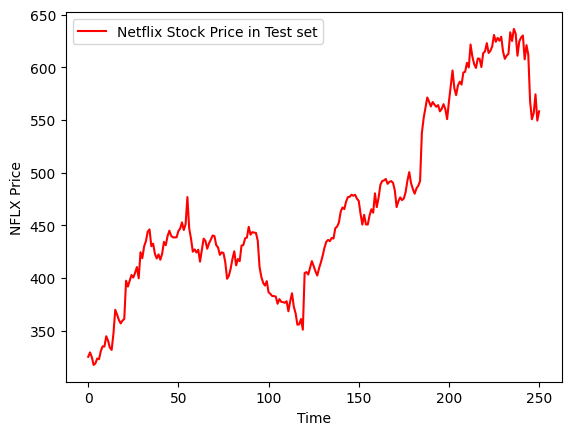

In [4]:
#Visualizing the Data
plt.plot(training_set, color = 'red', label = 'Netflix Stock Price in Test set')
plt.xlabel('Time')
plt.ylabel('NFLX Price')
plt.legend()
plt.show()

In [5]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [7]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [8]:
# Reshaping the data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [9]:
# Building the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))

C:\Users\dearm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
# Compiling and fitting the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 0.2529
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.0669
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0350
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0198
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0155
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0166
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0197
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - loss: 0.0167
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.0163
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0136
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 182ms/step - loss: 0.0146
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - loss: 0.0148
Epoch 13/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 0.0117
Epoch 14/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 0.0140
Epoch 15/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0123
Epoch 16/100
6/6 

In [11]:
# Making predictions
inputs = dataset_train['Open'].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step


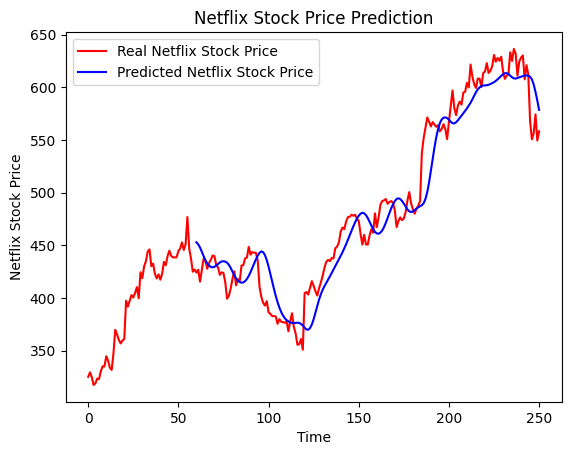

In [12]:
# Visualizing the results
plt.plot(dataset_train['Open'].values, color = 'red', label = 'Real Netflix Stock Price')
plt.plot(np.arange(60, len(inputs)), predicted_stock_price, color = 'blue', label = 'Predicted Netflix Stock Price')
plt.title('Netflix Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Netflix Stock Price')
plt.legend()
plt.show()
